<a href="https://colab.research.google.com/github/ligsid/comput_math_MIPT/blob/master/heat_diff_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №6
### Методы решения квазилинейного уравнения теплопроводности
####Вариант 1, задание 15

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

Условия задания:
</br> Численно и аналитически решить одну из смешанных задач для квазилинейного уравнения теплопроводности с точностью $ \varepsilon = 10^{-4} $ и сравнить их значения в одиннадцати равноудаленных точках в момент времени $T = 1$
</br> Дифференциальная задача: $$ \frac{\partial u}{\partial t} = \frac{1}{r^2} \frac{\partial}{\partial r}\left(r^2 u^{3/2} \frac{\partial u}{\partial r}\right), 0 < t \le 1, 0 < r < 1$$ $$ u(0, r) = \frac{r^{4/3}}{81^{1/3}}, 0 \le r \le 1 $$ $$ u(t, 0) = 0, 0 < t \le 1 $$ $$ u(t, 1) = \frac{1}{(9 - \frac{26}{3}t)^{2/3}}, 0 < t \le 1 $$

1. Аналитическое решение:
 $$ u = \frac{r^{2/ \mu}}{\left(C_{0} - \frac{2(\nu \mu + \mu + 2)}{\mu})t \right)^{1/\mu}} $$, где $ С_{0} = 9, \nu = 2, \mu = 3/2 $. Тогда решение нашей задачи будет:
 $$ u =  \frac{r^{4/3}}{\left(9 - \frac{26}{3}t \right)^{2/3}}$$

2. Построение разностной схемы:
$$ D_{h} = \{(x_{l}, t^n): x_{l} = lh, l = \overline{0, L}, hL = 1; t^n = n \tau, n = \overline{0, N}, \tau N = 27/26 - \Delta, \Delta > 0, \Delta = const \} $$ $$ \frac{u^{k+1}_{l} - u^{n}_{l}}{\tau} = \frac{r^{2}_{l+1/2}[(u^{k}_{l+1})^{3/2} + (u^{k}_{l})^{3/2}](u^{k+1}_{l+1} - u^{k+1}_{l})}{2r^{2}_{l} h^2} - \frac{r^{2}_{l-1/2}[(u^{k}_{l})^{3/2} + (u^{k}_{l - 1})^{3/2}](u^{k+1}_{l} - u^{k+1}_{l-1})}{2r^{2}_{l} h^2} $$ $$ l = \overline{1, L-1}, k = \overline{n, J}, n = \overline{0, N-1} $$ $$ u_{l}^{n+1} = u_{l}^{J+1}, l = \overline{1, L-1}, n = \overline{0, N-1}$$ $$ J = \left\{ \min k: \max_l \left|\frac{u_{l}^{k+1} - u_{l}^{k}}{u_{l}^{k+1}}\right| \le \varepsilon, \varepsilon = const \right\} $$
$$ u_{0}^{n} = 0 $$ $$ u_{L}^{n} = \frac{1}{(9 - \frac{26}{3}t^{n})^{2/3}}, n = \overline{1, N} $$ $$ u^{0}_{l} = \frac{r_{l}^{4/3}}{81^{1/3}}, l = \overline{0, L} $$

3. Реализация алгоритма

In [ ]:
print('Введите кол-во точек x:')
L = int(input())
x = np.linspace(0, 1, L+1)
h = 1/L
print('Введите число tau/h:')
tau = float(input()) * h
t = np.linspace(0, 1, int(1/tau) + 1)

Введите кол-во точек x:
10
Введите число tau/h:
1


Будем использовать метод прогонки вида:
$$ a^{k}_{l} u^{k+1}_{l+1} + b^{k}_{l} u^{k+1}_{l} + c^{k}_{l} u^{k+1}_{l-1} = d^{k}_{l} $$, где $$ a^{k}_{l} = \tau r^{2}_{l+1/2}[(u^{k}_{l+1})^{3/2} + (u^{k}_{l})^{3/2}] $$ $$ b^{k}_{l} = -2(r_{l})^2 h^2 - \tau r^{2}_{l+1/2}[(u^{k}_{l+1})^{3/2} + (u^{k}_{l})^{3/2}] - \tau r^{2}_{l-1/2}[(u^{k}_{l})^{3/2} + (u^{k}_{l-1})^{3/2}] $$ $$ c^{k}_{l} = \tau r^{2}_{l+1/2}[(u^{k}_{l})^{3/2} + (u^{k}_{l-1})^{3/2}] $$ $$ d^{k}_{l} = -2(r_{l})^2 h^2 u^{n}_{l} $$

При этом:
</br> $ b^{k}_{0} = 1 $, $ a^{k}_{0} = 0 $, $ d^{k}_{0} = 0 $
</br> $b^{k}_{L} = 1$, $c^{k}_{L} = 0$, $ d^{k}_{L} = \frac{1}{(9 - \frac{26}{3}t^{k})^{2/3}} $

In [ ]:
u = np.zeros((int(1/tau) + 1, L + 1))
for i in range(len(x)):
  u[0][i] = x[i]**(4/3)/(81**(1/3))
for i in range(1, len(t)):
  u[i][L] = 1/(9 - 26/3 * t[i])**(2/3)

def u_an(t, x):
  return x**(4/3)/((9 - 26/3 * t)**(2/3))

Реализация метода прогонки с четвертой лабораторной работы (немного адаптирована под суровые реалии этой лабы)

In [ ]:
def progonka_forward(k, l, u, n):
  alpha = [-a(k, 0, u)/b(k, 0, u)]
  beta = [d(k, 0, u, n)/b(k, 0, u)]
  #print(n,0,k, a(k, 0, u), b(k, 0, u), c(k, 0, u))
  for i in range(1, l):
    alpha.append(-a(k, i, u)/(b(k, i, u) + c(k, i, u)*alpha[i - 1]))
    #print(n,i,k, a(k, i, u), b(k, i, u), c(k, i, u))
    beta.append((d(k, i, u, n) - c(k, i, u)*beta[i-1])/(b(k, i, u) + c(k, i, u)*alpha[i - 1]))
  return (alpha, beta)
def progonka_backward(alpha, beta, k, u, n):
  alpha = alpha[::-1]
  beta = beta[::-1]
  u_l = [(d(k, L, u, n) - c(k, L, u) * beta[0])/(b(k, L, u) + c(k, L, u)*alpha[0])]
  for i in range(len(alpha)):
    u_l.append(alpha[i] * u_l[i] + beta[i])
  return u_l

In [ ]:
def a(k, l, u):
  if (l == 0 or l == L):
    return 0
  else:
    return tau * ((x[l] + h/2 )**2)*(u[k][l+1]**(3/2) + u[k][l]**(3/2))/(-2*(x[l]**2)*(h**2))

def b(k, l, u):
  if (l == 0 or l == L):
    return 1
  else:
    tmp2 = tau*((x[l] + h/2)**2)*(u[k][l+1]**(3/2) + u[k][l]**(3/2))/(2*(x[l]**2)*(h**2))
    tmp3 = tau*((x[l] - h/2)**2)*(u[k][l]**(3/2) + u[k][l - 1]**(3/2))/(2*(x[l]**2)*(h**2))
    return 1 + tmp2 + tmp3
def c(k, l, u):
  if (l == 0 or l == L):
    return 0
  else:
    return -tau*((x[l] - h/2)**2)*(u[k][l]**(3/2) + u[k][l-1]**(3/2))/(2*(x[l]**2)*(h**2))

def d(k, l, u, n):
  if (l == 0):
    return 0
  elif (l == L):
    return 1/((9 - 26/3 *(t[n + 1]))**(2/3))
  else:
    return u[n][l]

Осознание, что вообще делать и как, что должно работать, несколько тестовых строк

In [ ]:
def err_check(u):
  diff_u = []
  for i in range(1, len(u.T)):
    diff_u.append(abs((u[-1][i] - u[-2][i])/u[-1][i]))
  return max(diff_u)

In [ ]:
k = 0
alpha, beta = progonka_forward(k, L, u, 0)
u_k = np.array(progonka_backward(alpha, beta, k, u, 0))[::-1]
u_k = np.vstack((u[0], u_k))

In [ ]:
for i in range(1, 15):
  k = i
  alpha, beta = progonka_forward(k, L, u_k, 0)
  tmp = np.array(progonka_backward(alpha, beta, k, u_k, 0))[::-1]
  u_k = np.vstack((u_k, tmp))
  print(err_check(u_k))
  #if (err_check(u_k) <= 10**(-4)):
    #print('Досрочная остановка, число J =', k)

0.01160583060055014
0.0014325708599934141
0.00017072670517100035
1.9594818706103192e-05
2.0799964657357254e-06
1.8599148322853666e-07
1.15920687047402e-08
4.0381680587395286e-10
4.567233592314968e-11
4.3970198179935234e-12
2.1050921651217403e-13
2.5257715107816298e-14
1.161274257830633e-15
2.805842364961017e-16


In [ ]:
alpha, beta = progonka_forward(k+1, L, u_k, 0)
tmp = np.array(progonka_backward(alpha, beta, k+1, u_k, 0))[::-1]
u_k = np.vstack((u_k, tmp))
for i in range(len(u.T)):
  u[1][i] = u_k[-1][i]

Сравним с аналитическим решением

In [ ]:
data = pd.DataFrame()
data['Численное решение'] = u[1]
data['Аналитическое решение'] = u_an(t[1], x)
data

,Численное решение,Аналитическое решение
0,0.000000,0.000000
1,0.011950,0.011477
2,0.029370,0.028920
3,0.050192,0.049657
4,0.073532,0.072873
5,0.098921,0.098125
6,0.126046,0.125128
7,0.154667,0.153680
8,0.184564,0.183629
9,0.215514,0.214854


In [ ]:
print('Max diff:', max(abs(u[1] - u_an(t[1], x))))

Max diff: 0.0009862484342234579


Text(0.5, 1.0, 'Графики функций для сравнения решений, tau/h = 1')

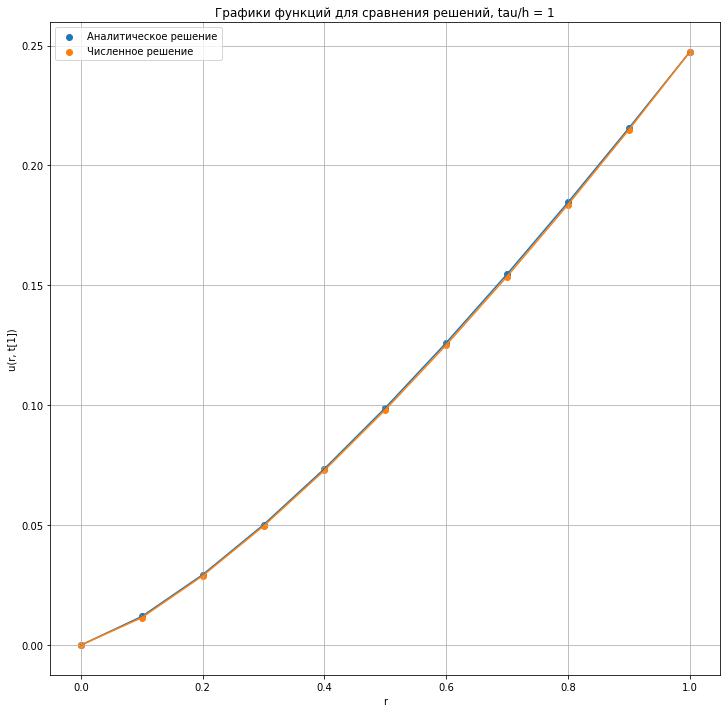

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x, u[1], label = 'Аналитическое решение')
plt.scatter(x, u_an(t[1], x), label = 'Численное решение')
plt.plot(x, u[1])
plt.plot(x, u_an(t[1], x))
plt.grid()
plt.xlabel('r')
plt.ylabel('u(r, t[1])')
plt.legend()
plt.title('Графики функций для сравнения решений, tau/h = 1')

In [ ]:
k = 1
alpha, beta = progonka_forward(k, L, u, 1)
u_k = np.array(progonka_backward(alpha, beta, k, u, 1))[::-1]
u_k = np.vstack((u[1], u_k))
while (err_check(u_k) >= 10**(-15)):
    #print(err_check(u_k))
    alpha, beta = progonka_forward(k, L, u_k, 1)
    tmp = np.array(progonka_backward(alpha, beta, k, u_k, 1))[::-1]
    u_k = np.vstack((u_k, tmp))
    k = k + 1
print('Число J =', k - 1)

Число J = 15


In [ ]:
alpha, beta = progonka_forward(k, L, u_k, 1)
tmp = np.array(progonka_backward(alpha, beta, k, u_k, 1))[::-1]
u_k = np.vstack((u_k, tmp))
for i in range(len(u.T)):
  u[2][i] = u_k[-1][i]

In [ ]:
print('Погрешность:', max(abs(u[2] - u_an(t[2], x))))

Погрешность: 0.013787217547213959


In [ ]:
data = pd.DataFrame()
data['Численное решение'] = u[2]
data['Аналитическое решение'] = u_an(t[2], x)
data

,Численное решение,Аналитическое решение
0,0.000000,0.000000
1,0.015176,0.012372
2,0.035487,0.031176
3,0.059993,0.053531
4,0.087393,0.078558
5,0.116906,0.105780
6,0.147844,0.134890
7,0.179456,0.165669
8,0.210789,0.197953
9,0.240509,0.231615


Text(0.5, 1.0, 'Графики функций для сравнения решений, tau/h = 1')

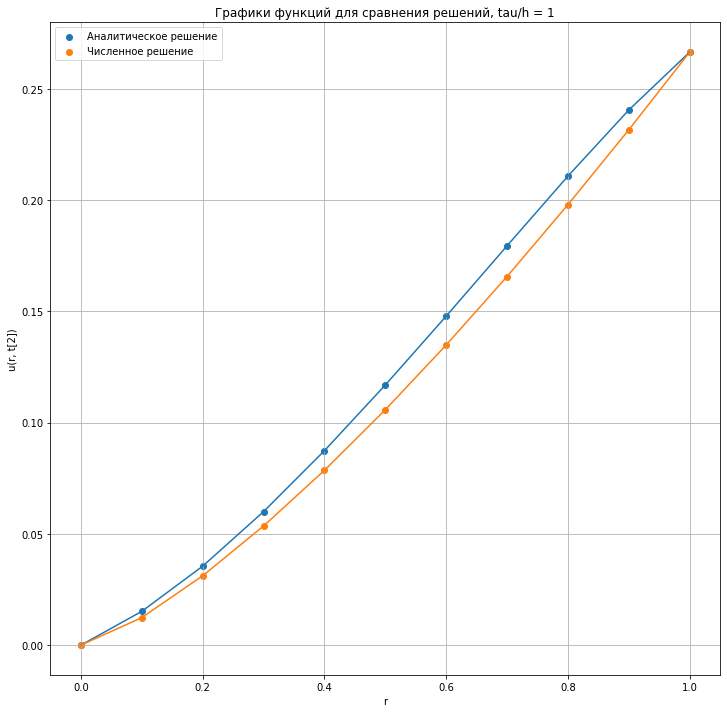

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x, u[2], label = 'Аналитическое решение')
plt.scatter(x, u_an(t[2], x), label = 'Численное решение')
plt.plot(x, u[2])
plt.plot(x, u_an(t[2], x))
plt.grid()
plt.xlabel('r')
plt.ylabel('u(r, t[2])')
plt.legend()
plt.title('Графики функций для сравнения решений, tau/h = 1')

Реализуем алгоритм для всех точек сразу

In [ ]:
for n in range(len(t) - 1):
  alpha, beta = progonka_forward(n, L, u, n)
  u_k = np.array(progonka_backward(alpha, beta, n, u, n))[::-1]
  u_k = np.vstack((u[:(n+1)], u_k))
  k = n
  while (err_check(u_k) >= 10**(-3)):
    k = k + 1
    #print(n, err_check(u_k))
    #print(u_k)
    alpha, beta = progonka_forward(k, L, u_k, n)
    tmp = np.array(progonka_backward(alpha, beta, k, u_k, n))[::-1]
    u_k = np.vstack((u_k, tmp))
  #print(n, k)
  #print(n, err_check(u_k))
  alpha, beta = progonka_forward(k, L, u_k, n)
  tmp = np.array(progonka_backward(alpha, beta, k, u_k, n))[::-1]
  u_k = np.vstack((u_k, tmp))
  for i in range(len(u.T)):
    u[n + 1][i] = u_k[-1][i]

In [ ]:
print('Погрешность:', max((abs(u_an(t[-1], x) - u[-1]))))

Погрешность: 1.0811479412601668


In [ ]:
data = pd.DataFrame()
data['Численное решение'] = u[-1]
data['Аналитическое решение'] = u_an(t[-1], x)
data['Разность аналитического и численного решения'] = abs(u[-1] - u_an(t[-1], x))
data

,Численное решение,Аналитическое решение,Разность аналитического и численного решения
0,0.000000,0.000000,0.000000
1,1.177697,0.096549,1.081148
2,1.271896,0.243288,1.028608
3,1.346503,0.417743,0.928760
4,1.427873,0.613048,0.814825
5,1.518802,0.825482,0.693320
6,1.618517,1.052646,0.565870
7,1.725662,1.292840,0.432822
8,1.838968,1.544783,0.294185
9,1.957384,1.807469,0.149915


Text(0.5, 1.0, 'Графики функций для сравнения решений, tau/h = 1')

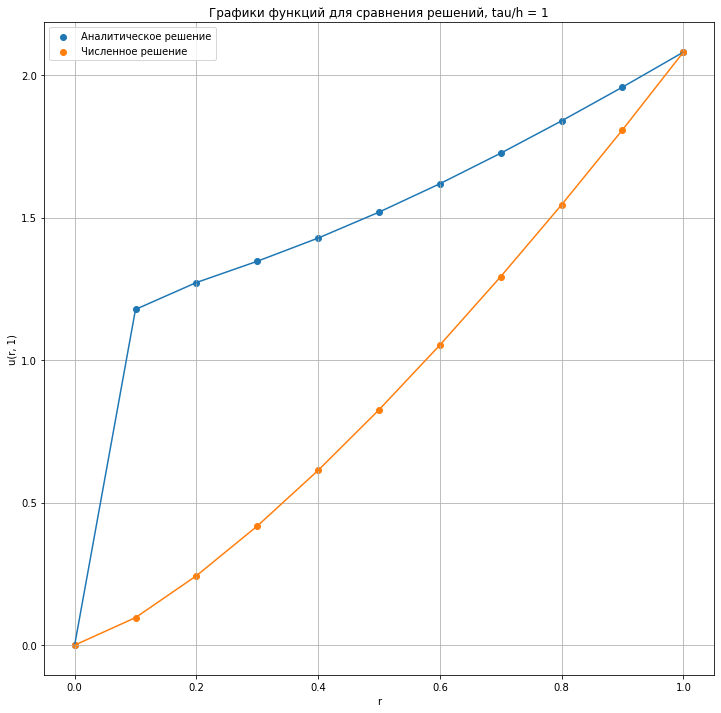

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x, u[-1], label = 'Аналитическое решение')
plt.scatter(x, u_an(t[-1], x), label = 'Численное решение')
plt.plot(x, u[-1])
plt.plot(x, u_an(t[-1], x))
plt.grid()
plt.xlabel('r')
plt.ylabel('u(r, 1)')
plt.legend()
plt.title('Графики функций для сравнения решений, tau/h = 1')

#### Построим графики зависисимости от $\tau/ h$

In [ ]:
def u_calculation(tau_h, L):
  x = np.linspace(0, 1, L+1)
  h = 1/L
  tau = tau_h * h
  t = np.linspace(0, 1, int(1/tau) + 1)

  u = np.zeros((int(1/tau) + 1, L + 1))
  for i in range(len(x)):
    u[0][i] = x[i]**(4/3)/(81**(1/3))
  for i in range(1, len(t)):
    u[i][L] = 1/(9 - 26/3 * t[i])**(2/3)

  for n in range(len(t) - 1):
    alpha, beta = progonka_forward(n, L, u, n)
    u_k = np.array(progonka_backward(alpha, beta, n, u, n))[::-1]
    u_k = np.vstack((u[:(n+1)], u_k))
    k = n
    while (err_check(u_k) >= 10**(-3)):
      k += 1
      alpha, beta = progonka_forward(k, L, u_k, n)
      tmp = np.array(progonka_backward(alpha, beta, k, u_k, n))[::-1]
      u_k = np.vstack((u_k, tmp))
    alpha, beta = progonka_forward(k, L, u_k, n)
    tmp = np.array(progonka_backward(alpha, beta, k, u_k, n))[::-1]
    u_k = np.vstack((u_k, tmp))
    for i in range(len(u.T)):
      u[n + 1][i] = u_k[-1][i]
  return u

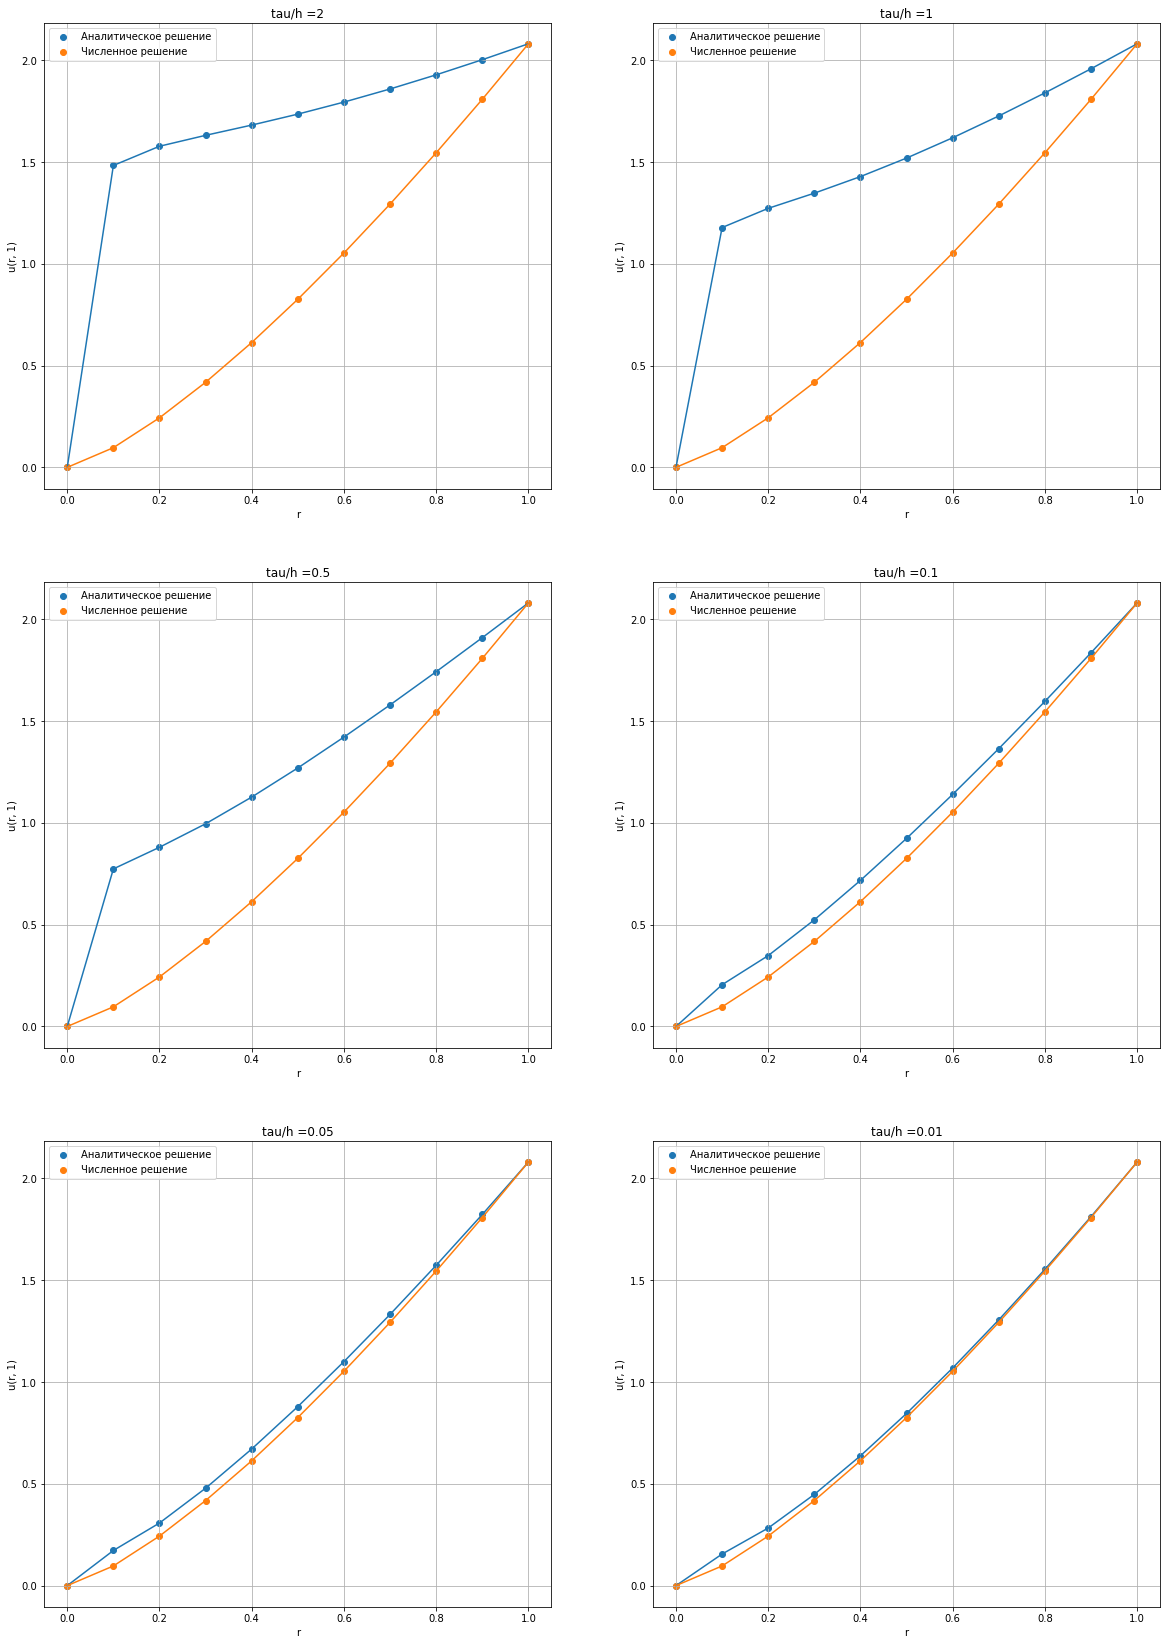

In [ ]:
tau_h = [2, 1, 0.5, 0.1, 0.05, 0.01]

plt.figure(figsize=(20, 60))
plot_number = 0
for i in range(len(tau_h)):
  h = 1/L
  tau = tau_h[i] * h
  L = 10
  x = np.linspace(0, 1, L+1)
  t = np.linspace(0, 1, int(1/tau) + 1)
  u = u_calculation(tau_h[i], 10)
  plot_number += 1
  plt.subplot(6, 2, plot_number)
  plt.title('tau/h =' + str(tau_h[i]))
  plt.scatter(x, u[-1], label = 'Аналитическое решение')
  plt.scatter(x, u_an(t[-1], x), label = 'Численное решение')
  plt.plot(x, u[-1])
  plt.plot(x, u_an(t[-1], x))
  plt.grid()
  plt.xlabel('r')
  plt.ylabel('u(r, 1)')
  plt.legend()

 ## Вывод:
 1. Чем дальше отходим от $t = 0$, тем сильнее становится погрешность, что демонстрирует график при $t = 1$
 2. По итогу численное решение крайне плохо описывает функцию при больших значения $\tau/h$, но хорошо при очень малых

## Дополнение к лабораторной
### Попробуем решить методом, который устойчив не при всех $ \tau/ h $

Уравнение можем свести к:
$$ \frac{\partial u}{\partial t} = u^{3/2}\Delta u + \frac{3}{2}\sqrt{u}\frac{\partial u}{\partial r} $$

Используем явную разностную схему:
$$ u^{n+1}_{l} = u^{n}_{l} + \tau \left(\frac{2(u^{n}_{l})^{3/2}}{r_{l}} + \frac{3}{2}(u^{n}_{l})^{1/2} \right) \frac{u^{n}_{l+1} - u^{n}_{l-1}}{2h} + (u^{n}_{l})^{3/2} \frac{u^{n}_{l+1} - 2 u^{n}_{l} + u^{n}_{l-1}}{h^{2}} $$

In [ ]:
for n in range(len(t) - 1):
  for l in range(1, len(x) - 1):
    tmp1 = tau * (2*(u[n][l]**(3/2))/x[l] + (3/2)*(u[n][l]**(1/2)))*(u[n][l+1] - u[n][l-1])/(2*h)
    tmp2 = tau * (u[n][l]**(3/2))*(u[n][l+1] - 2*u[n][l] + u[n][l-1])/(h**2)
    #print(n, l, tmp1, tmp2)
    u[n + 1][l] = u[n][l] + tmp1 + tmp2

Text(0.5, 1.0, 'Графики функций для сравнения решений, tau/h = 0.01')

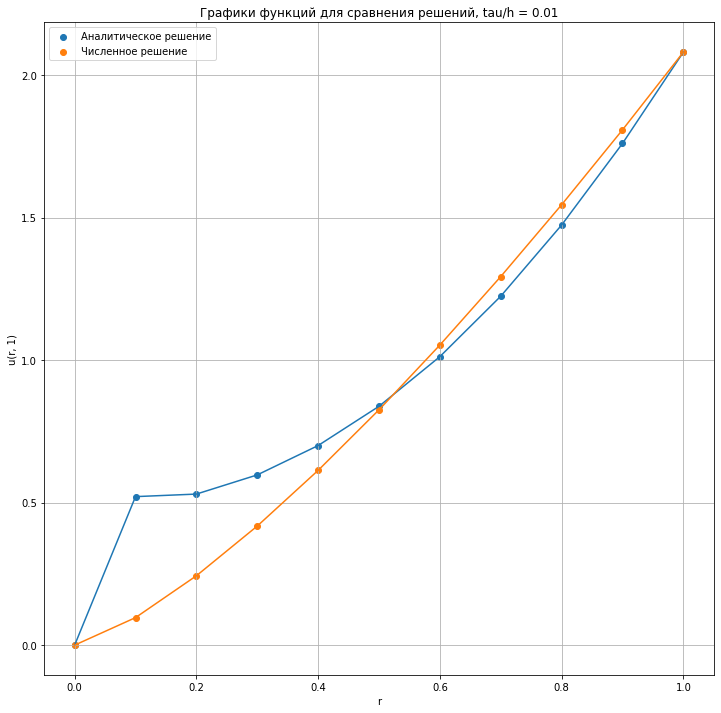

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x, u[-1], label = 'Аналитическое решение')
plt.scatter(x, u_an(t[-1], x), label = 'Численное решение')
plt.plot(x, u[-1])
plt.plot(x, u_an(t[-1], x))
plt.grid()
plt.xlabel('r')
plt.ylabel('u(r, 1)')
plt.legend()
plt.title('Графики функций для сравнения решений, tau/h = 0.01')

Получилась фигня